Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599999 entries, 0 to 599998
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Feature1  599999 non-null  float64
 1   Feature2  599999 non-null  float64
 2   Target    599999 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 13.7 MB
None

First 5 Rows:
   Feature1  Feature2  Target
0  2.222704  0.968017       5
1  2.741494  0.032837       0
2  0.639511  0.423301       5
3  2.007407  0.246003       0
4  2.667903  0.020489       1


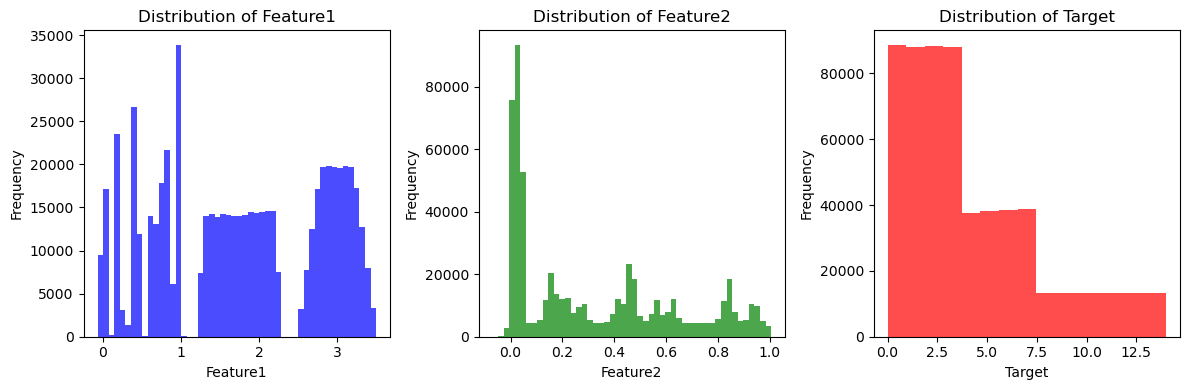

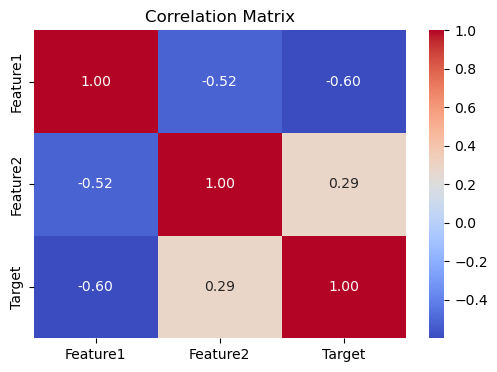

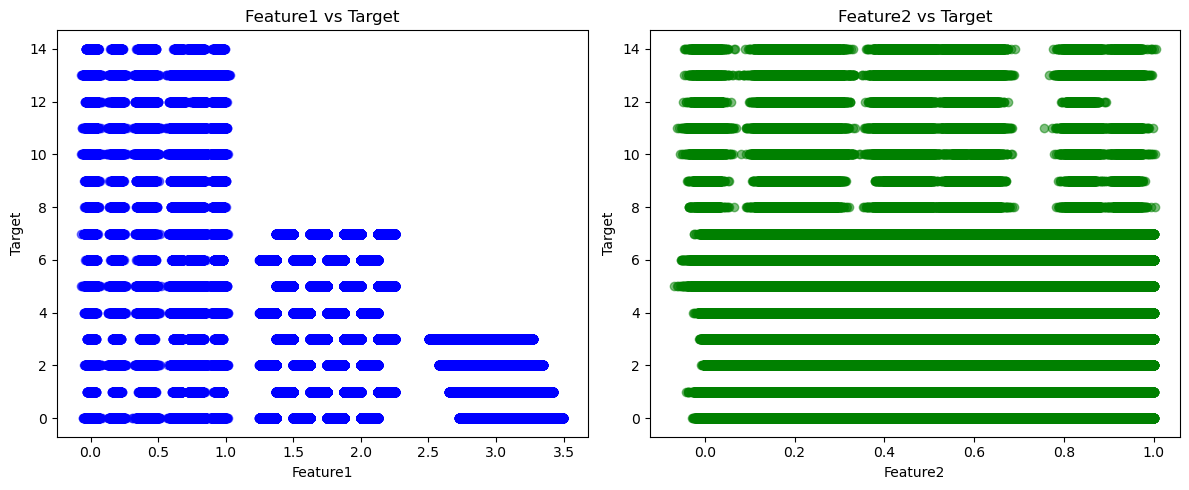


Mean Values by Target Category:
                 Feature1  Feature2
Target_Category                    
Low              2.184223  0.247758
Medium           1.200261  0.481157
High             0.508211  0.418868


C:\Users\arman.manoukyan\AppData\Local\Temp\ipykernel_20296\333931195.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_means = df.groupby("Target_Category")[["Feature1", "Feature2"]].mean()


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set file path
file_path = r"C:\Users\arman.manoukyan\Downloads\combined_dataset mix.csv"

# Load dataset
df = pd.read_csv(file_path)

# Rename columns for clarity
df.columns = ["Feature1", "Feature2", "Target"]

# Display basic information
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

# Step 1: Plot Distributions
plt.figure(figsize=(12, 4))

# Feature1 Distribution
plt.subplot(1, 3, 1)
plt.hist(df["Feature1"], bins=50, alpha=0.7, color="blue")
plt.xlabel("Feature1")
plt.ylabel("Frequency")
plt.title("Distribution of Feature1")

# Feature2 Distribution
plt.subplot(1, 3, 2)
plt.hist(df["Feature2"], bins=50, alpha=0.7, color="green")
plt.xlabel("Feature2")
plt.ylabel("Frequency")
plt.title("Distribution of Feature2")

# Target Distribution
plt.subplot(1, 3, 3)
plt.hist(df["Target"], bins=15, alpha=0.7, color="red")
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.title("Distribution of Target")

plt.tight_layout()
plt.show()

# Step 2: Compute Correlation
correlation_matrix = df.corr()

# Plot Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Step 3: Scatter Plot Analysis
plt.figure(figsize=(12, 5))

# Feature1 vs Target
plt.subplot(1, 2, 1)
plt.scatter(df["Feature1"], df["Target"], alpha=0.5, color="blue")
plt.xlabel("Feature1")
plt.ylabel("Target")
plt.title("Feature1 vs Target")

# Feature2 vs Target
plt.subplot(1, 2, 2)
plt.scatter(df["Feature2"], df["Target"], alpha=0.5, color="green")
plt.xlabel("Feature2")
plt.ylabel("Target")
plt.title("Feature2 vs Target")

plt.tight_layout()
plt.show()

# Step 4: Categorizing Target Values
df["Target_Category"] = pd.cut(df["Target"], bins=[-1, 4, 9, 14], labels=["Low", "Medium", "High"])

# Compute mean values for each category
category_means = df.groupby("Target_Category")[["Feature1", "Feature2"]].mean()

# Display Results
print("\nMean Values by Target Category:")
print(category_means)


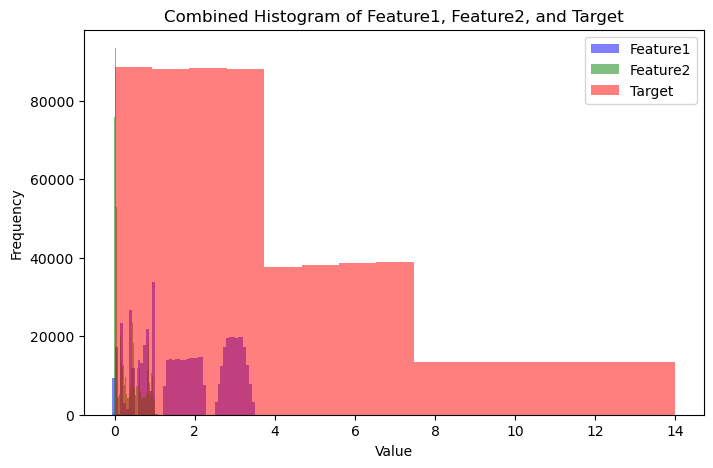

In [5]:
# Create a combined histogram for all features and target
plt.figure(figsize=(8, 5))

plt.hist(df["Feature1"], bins=50, alpha=0.5, label="Feature1", color="blue")
plt.hist(df["Feature2"], bins=50, alpha=0.5, label="Feature2", color="green")
plt.hist(df["Target"], bins=15, alpha=0.5, label="Target", color="red")

plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Combined Histogram of Feature1, Feature2, and Target")
plt.legend()
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = df[["Feature1", "Feature2"]]
y = df["Target"]

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
model_coefficients = {
    "Intercept": model.intercept_,
    "Feature1 Coefficient": model.coef_[0],
    "Feature2 Coefficient": model.coef_[1],
    "Mean Squared Error": mse,
    "R² Score": r2
}

model_coefficients


{'Intercept': 7.977144544111466,
 'Feature1 Coefficient': -2.179010565373608,
 'Feature2 Coefficient': -0.4034635552489377,
 'Mean Squared Error': 8.638832341108964,
 'R² Score': 0.3603236461222582}

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Try a Polynomial Regression Model (degree=2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

# Predict using the polynomial model
y_poly_pred = poly_model.predict(X_test)

# Evaluate performance
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

# Display results
poly_model_performance = {
    "Mean Squared Error (Polynomial)": mse_poly,
    "R² Score (Polynomial)": r2_poly
}

poly_model_performance


{'Mean Squared Error (Polynomial)': 8.606700475198279,
 'R² Score (Polynomial)': 0.36270290225519963}

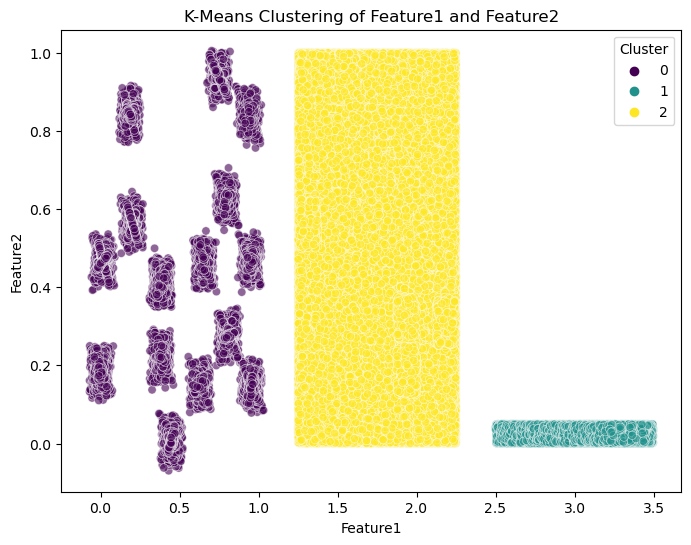

Feature1  Feature2
0  0.540505  0.440091
1  2.999829  0.025044
2  1.753271  0.501313

In [9]:
from sklearn.cluster import KMeans

# Choose an optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df[["Feature1", "Feature2"]])

# Scatter plot to visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Feature1"], y=df["Feature2"], hue=df["Cluster"], palette="viridis", alpha=0.6)
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("K-Means Clustering of Feature1 and Feature2")
plt.legend(title="Cluster")
plt.show()

# Display cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=["Feature1", "Feature2"])
cluster_centers


In [10]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import zscore

# Step 1: Feature Engineering (Create new features)
df["Feature1_Feature2_Ratio"] = df["Feature1"] / (df["Feature2"] + 1e-6)  # Avoid division by zero
df["Feature1_Feature2_Product"] = df["Feature1"] * df["Feature2"]

# Step 2: Outlier Detection (Using Z-score method)
z_scores = np.abs(zscore(df[["Feature1", "Feature2", "Target"]]))  # Compute Z-scores
df_no_outliers = df[(z_scores < 3).all(axis=1)]  # Remove rows where any feature has Z-score > 3

# Step 3: Decision Tree Regression (To find hidden rules)
X_tree = df_no_outliers[["Feature1", "Feature2", "Feature1_Feature2_Ratio", "Feature1_Feature2_Product"]]
y_tree = df_no_outliers["Target"]

# Train Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_tree, y_tree)

# Extract decision rules
from sklearn.tree import export_text
tree_rules = export_text(tree_model, feature_names=X_tree.columns)
tree_rules


'|--- Feature1 <= 1.14\n|   |--- Feature1_Feature2_Product <= 0.78\n|   |   |--- Feature1 <= 0.13\n|   |   |   |--- Feature2 <= 0.20\n|   |   |   |   |--- value: [7.24]\n|   |   |   |--- Feature2 >  0.20\n|   |   |   |   |--- value: [8.65]\n|   |   |--- Feature1 >  0.13\n|   |   |   |--- Feature2 <= 0.82\n|   |   |   |   |--- value: [6.88]\n|   |   |   |--- Feature2 >  0.82\n|   |   |   |   |--- value: [5.83]\n|   |--- Feature1_Feature2_Product >  0.78\n|   |   |--- Feature1_Feature2_Product <= 0.80\n|   |   |   |--- Feature2 <= 0.85\n|   |   |   |   |--- value: [9.36]\n|   |   |   |--- Feature2 >  0.85\n|   |   |   |   |--- value: [12.09]\n|   |   |--- Feature1_Feature2_Product >  0.80\n|   |   |   |--- Feature1 <= 0.93\n|   |   |   |   |--- value: [10.97]\n|   |   |   |--- Feature1 >  0.93\n|   |   |   |   |--- value: [5.95]\n|--- Feature1 >  1.14\n|   |--- Feature1 <= 2.66\n|   |   |--- Feature1_Feature2_Product <= 1.42\n|   |   |   |--- Feature1_Feature2_Product <= 1.04\n|   |   | 

In [11]:
# Re-load necessary libraries and dataset after reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore
from sklearn.tree import export_text
# Reload dataset
file_path = r"C:\Users\arman.manoukyan\Downloads\combined_dataset mix.csv"
df = pd.read_csv(file_path)

# Rename columns for clarity
df.columns = ["Feature1", "Feature2", "Target"]

# Step 1: Feature Engineering (Create new features)
df["Feature1_Feature2_Ratio"] = df["Feature1"] / (df["Feature2"] + 1e-6)  # Avoid division by zero
df["Feature1_Feature2_Product"] = df["Feature1"] * df["Feature2"]

# Step 2: Outlier Detection (Using Z-score method)
z_scores = np.abs(zscore(df[["Feature1", "Feature2", "Target"]]))  # Compute Z-scores
df_no_outliers = df[(z_scores < 3).all(axis=1)]  # Remove rows where any feature has Z-score > 3

# Step 3: Decision Tree Regression (To find hidden rules)
X_tree = df_no_outliers[["Feature1", "Feature2", "Feature1_Feature2_Ratio", "Feature1_Feature2_Product"]]
y_tree = df_no_outliers["Target"]

# Train Decision Tree model
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_tree, y_tree)

# Extract decision rules
tree_rules = export_text(tree_model, feature_names=X_tree.columns)
tree_rules


'|--- Feature1 <= 1.14\n|   |--- Feature1_Feature2_Product <= 0.78\n|   |   |--- Feature1 <= 0.13\n|   |   |   |--- Feature2 <= 0.20\n|   |   |   |   |--- value: [7.24]\n|   |   |   |--- Feature2 >  0.20\n|   |   |   |   |--- value: [8.65]\n|   |   |--- Feature1 >  0.13\n|   |   |   |--- Feature2 <= 0.82\n|   |   |   |   |--- value: [6.88]\n|   |   |   |--- Feature2 >  0.82\n|   |   |   |   |--- value: [5.83]\n|   |--- Feature1_Feature2_Product >  0.78\n|   |   |--- Feature1_Feature2_Product <= 0.80\n|   |   |   |--- Feature2 <= 0.85\n|   |   |   |   |--- value: [9.36]\n|   |   |   |--- Feature2 >  0.85\n|   |   |   |   |--- value: [12.09]\n|   |   |--- Feature1_Feature2_Product >  0.80\n|   |   |   |--- Feature1 <= 0.93\n|   |   |   |   |--- value: [10.97]\n|   |   |   |--- Feature1 >  0.93\n|   |   |   |   |--- value: [5.95]\n|--- Feature1 >  1.14\n|   |--- Feature1 <= 2.66\n|   |   |--- Feature1_Feature2_Product <= 1.42\n|   |   |   |--- Feature1_Feature2_Product <= 1.04\n|   |   | 

In [12]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\arman.manoukyan\Downloads\combined_dataset mix.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Display basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())


   0.394313  0.3861097  12
0  2.222704   0.968017   5
1  2.741494   0.032837   0
2  0.639511   0.423301   5
3  2.007407   0.246003   0
4  2.667903   0.020489   1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599999 entries, 0 to 599998
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   0.394313   599999 non-null  float64
 1   0.3861097  599999 non-null  float64
 2   12         599999 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 13.7 MB
None
0.394313     0
0.3861097    0
12           0
dtype: int64


In [13]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Fill missing values (Example: numerical columns with mean)
df_filled = df.fillna(df.mean())

# Check again for missing values
print(df_filled.isnull().sum())


0.394313     0
0.3861097    0
12           0
dtype: int64


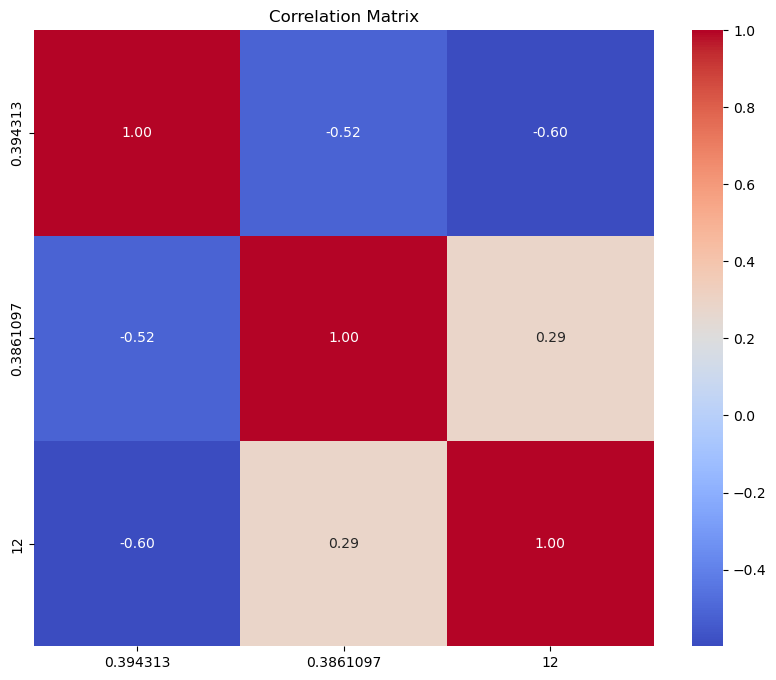

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


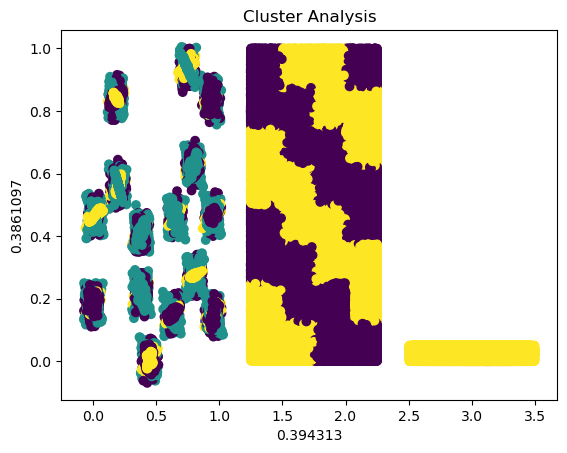

In [15]:
from sklearn.cluster import KMeans
import numpy as np

# Select numerical features for clustering
numerical_cols = df_cleaned.select_dtypes(include=['number']).columns
X = df_cleaned[numerical_cols].dropna()

# Run K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned["Cluster"] = kmeans.fit_predict(X)

# Plot the first two numerical features
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df_cleaned["Cluster"], cmap='viridis')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("Cluster Analysis")
plt.show()


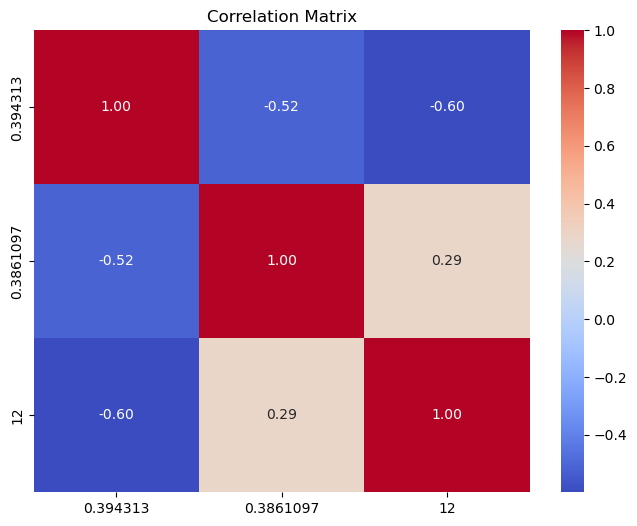

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


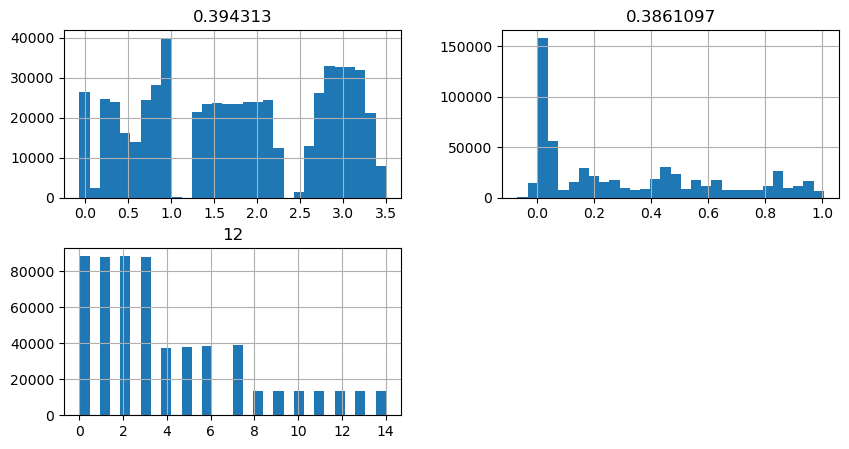

In [17]:
# Plot histograms for numerical features
df.hist(figsize=(10, 5), bins=30)
plt.show()


c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


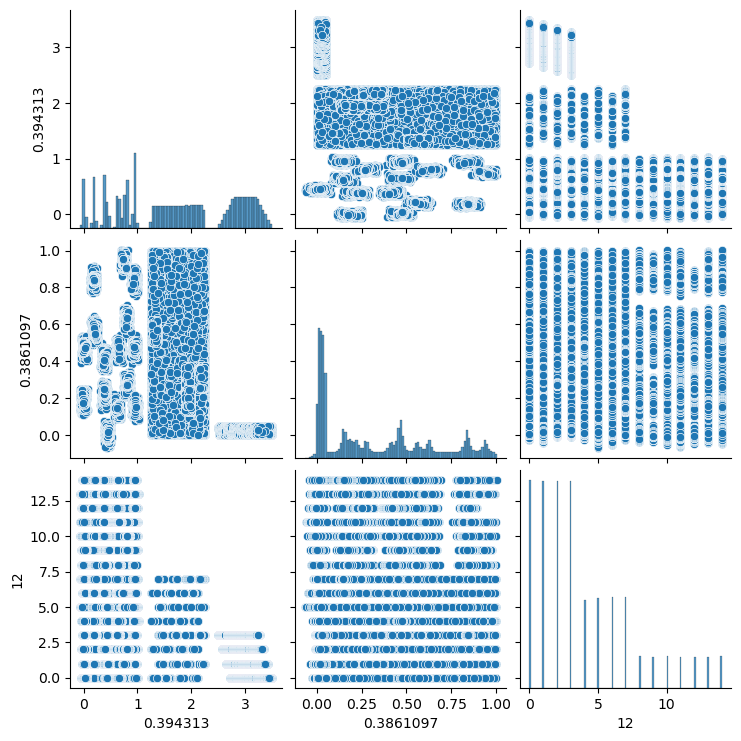

In [18]:
sns.pairplot(df)
plt.show()


c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


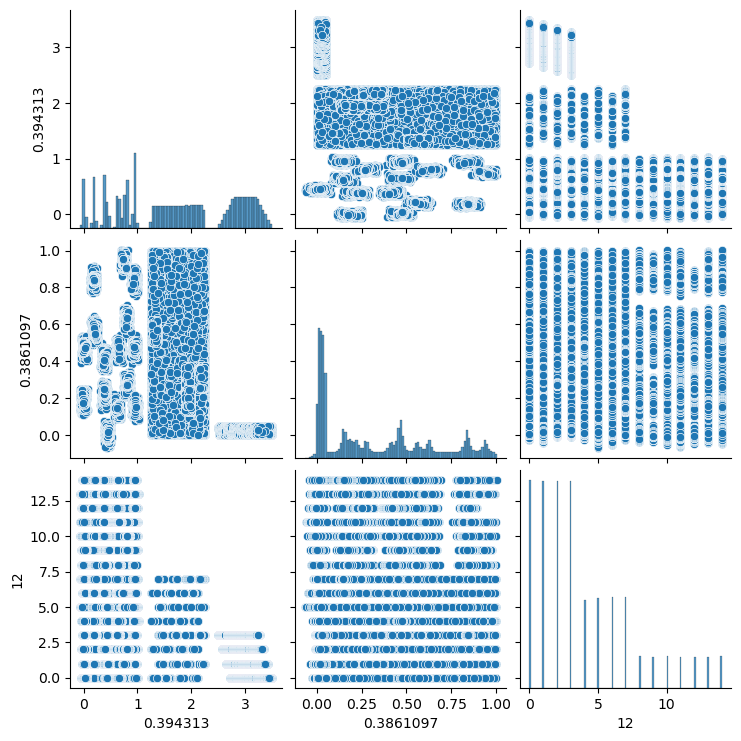

In [19]:
sns.pairplot(df)
plt.show()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Feature1  600000 non-null  float64
 1   Feature2  600000 non-null  float64
 2   Feature3  600000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 13.7 MB
None

First 5 Rows:
   Feature1  Feature2  Feature3
0  0.394313  0.386110        12
1  2.222704  0.968017         5
2  2.741494  0.032837         0
3  0.639511  0.423301         5
4  2.007407  0.246003         0

Missing Values:
Feature1    0
Feature2    0
Feature3    0
dtype: int64

Data Types:
Feature1    float64
Feature2    float64
Feature3      int64
dtype: object

Summary Statistics:
            Feature1       Feature2       Feature3
count  600000.000000  600000.000000  600000.000000
mean        1.764535       0.322149       4.002565
std         1.043025       0.312282       3.684047
min        -0.069430      -0.

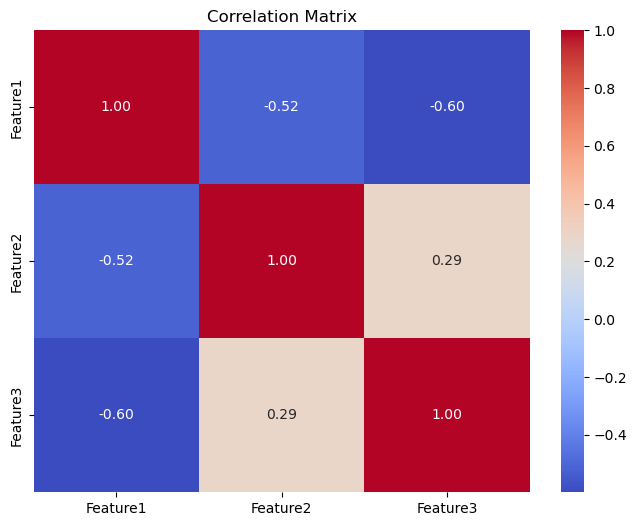

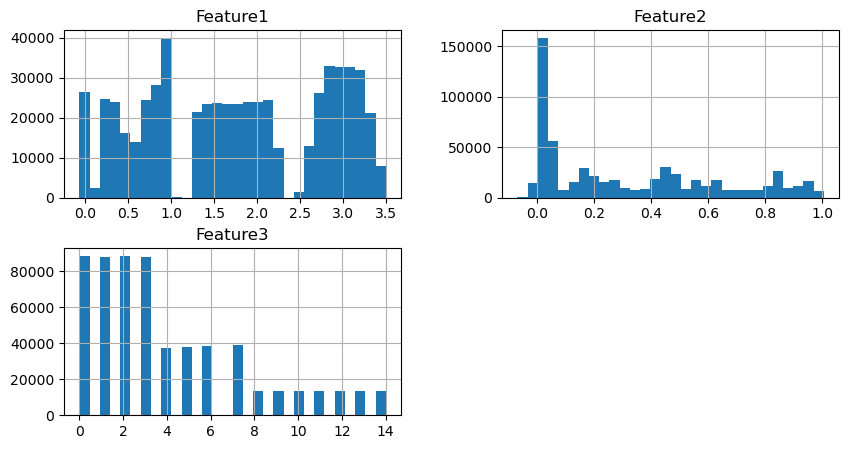

c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


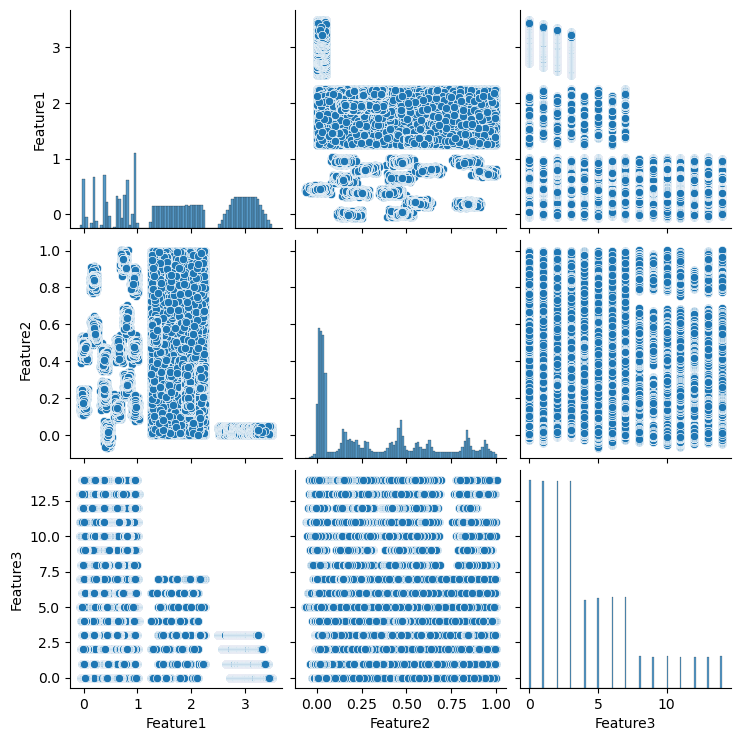

c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


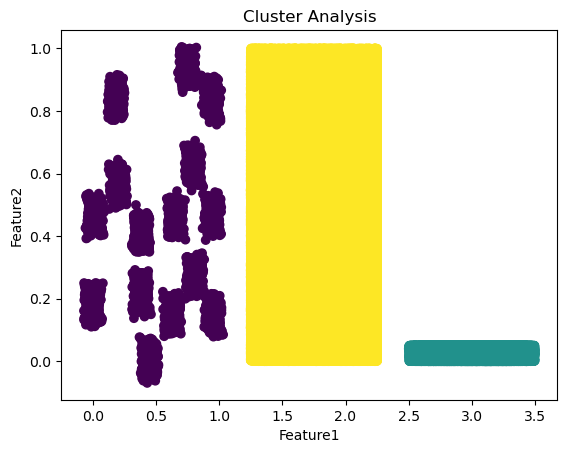

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Load the dataset correctly
file_path = r"C:\Users\arman.manoukyan\Downloads\combined_dataset mix.csv"
df = pd.read_csv(file_path, header=None)

# Rename columns for clarity
df.columns = ["Feature1", "Feature2", "Feature3"]

# Step 2: Basic Information
print("Dataset Info:")
print(df.info())

print("\nFirst 5 Rows:")
print(df.head())

# Step 3: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Step 4: Identify data types and summary statistics
print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics:")
print(df.describe())

# Step 5: Check Correlation between features
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Step 6: Visualize Data Distribution
df.hist(figsize=(10, 5), bins=30)
plt.show()

# Step 7: Pairplot to visualize relationships between variables
sns.pairplot(df)
plt.show()

# Step 8: Apply K-Means Clustering (Detecting patterns in data)
X = df[["Feature1", "Feature2"]]
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# Scatter plot for clustering visualization
plt.scatter(df["Feature1"], df["Feature2"], c=df["Cluster"], cmap="viridis")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Cluster Analysis")
plt.show()


c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

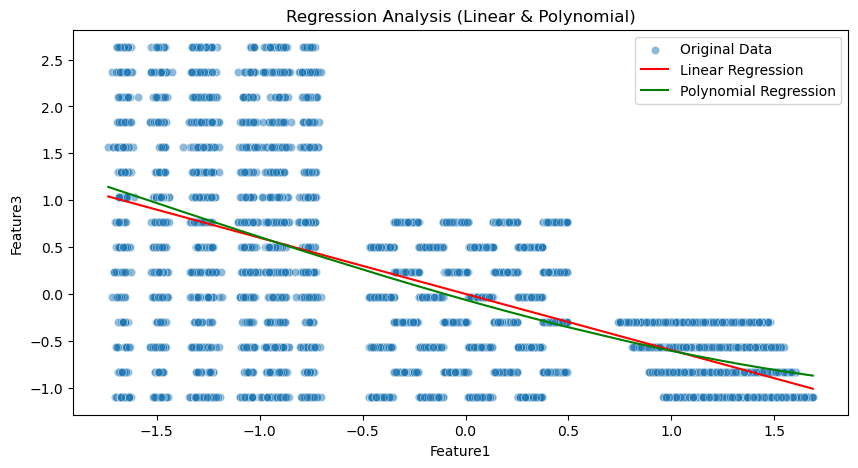

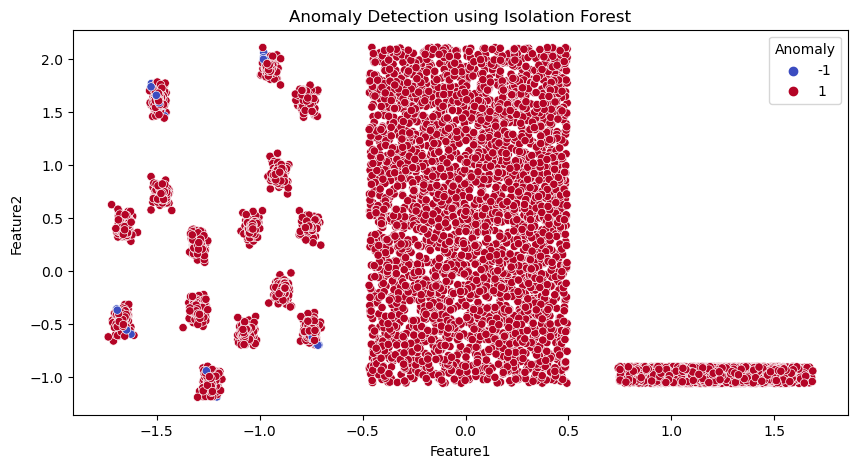

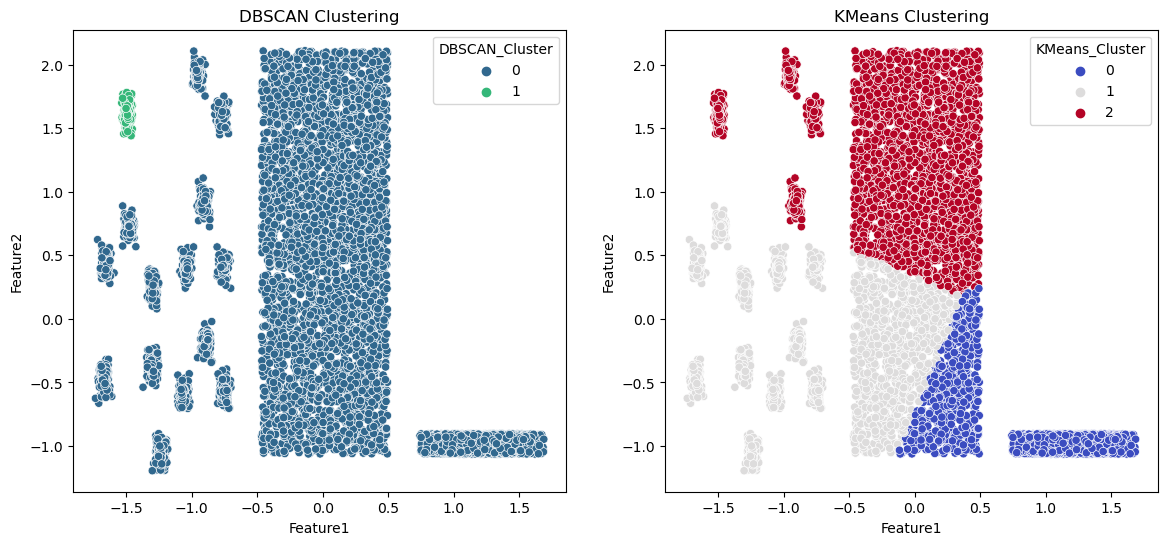

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.cluster import DBSCAN, KMeans
from sklearn.ensemble import IsolationForest

# Load dataset
file_path = r"C:\Users\arman.manoukyan\Downloads\combined_dataset mix.csv"
df = pd.read_csv(file_path, header=None)

# Rename columns for clarity
df.columns = ["Feature1", "Feature2", "Feature3"]

# Step 1: Reduce dataset size for efficiency
df_sample = df.sample(n=10000, random_state=42)  # Taking a subset of 10,000 rows

# Step 2: Standardize the Data for Better Analysis
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_sample), columns=df.columns)

# Step 3: Linear Regression (Finding Relationships Between Features)
X = df_scaled[['Feature1']]
y = df_scaled['Feature3']

linear_reg = LinearRegression()
linear_reg.fit(X, y)
df_scaled['Linear_Pred'] = linear_reg.predict(X)

# Polynomial Regression (Higher Order Relationship)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
df_scaled['Polynomial_Pred'] = poly_reg.predict(X_poly)

# Step 4: Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df_scaled['Anomaly'] = iso_forest.fit_predict(df_scaled[['Feature1', 'Feature2', 'Feature3']])

# Step 5: Advanced Clustering using DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # Adjusted parameters for better memory efficiency
df_scaled['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled[['Feature1', 'Feature2']])

# Step 6: Advanced Clustering using KMeans (for comparison)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled[['Feature1', 'Feature2']])

# Step 7: Visualizing Regression Results
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_scaled['Feature1'], y=df_scaled['Feature3'], label="Original Data", alpha=0.5)
sns.lineplot(x=df_scaled['Feature1'], y=df_scaled['Linear_Pred'], label="Linear Regression", color="red")
sns.lineplot(x=df_scaled['Feature1'], y=df_scaled['Polynomial_Pred'], label="Polynomial Regression", color="green")
plt.title("Regression Analysis (Linear & Polynomial)")
plt.legend()
plt.show()

# Step 8: Visualizing Anomaly Detection
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_scaled['Feature1'], y=df_scaled['Feature2'], hue=df_scaled['Anomaly'], palette="coolwarm")
plt.title("Anomaly Detection using Isolation Forest")
plt.show()

# Step 9: Visualizing Clusters (DBSCAN & KMeans)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=df_scaled['Feature1'], y=df_scaled['Feature2'], hue=df_scaled['DBSCAN_Cluster'], ax=axes[0], palette="viridis")
axes[0].set_title("DBSCAN Clustering")

sns.scatterplot(x=df_scaled['Feature1'], y=df_scaled['Feature2'], hue=df_scaled['KMeans_Cluster'], ax=axes[1], palette="coolwarm")
axes[1].set_title("KMeans Clustering")

plt.show()


c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


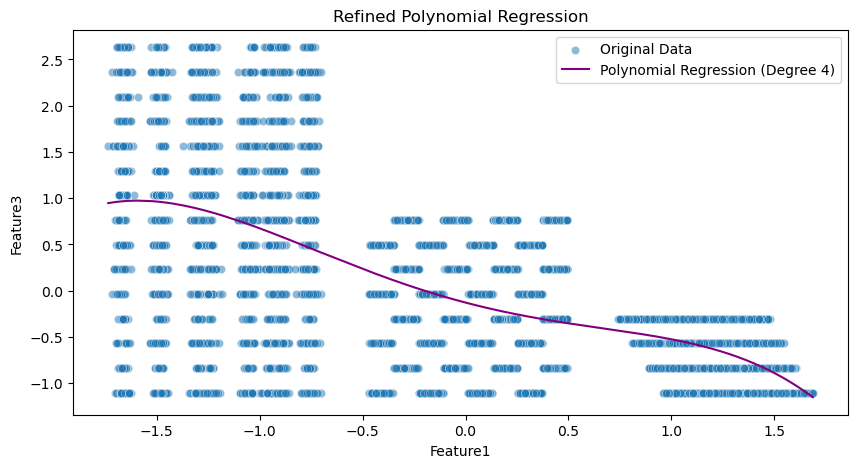

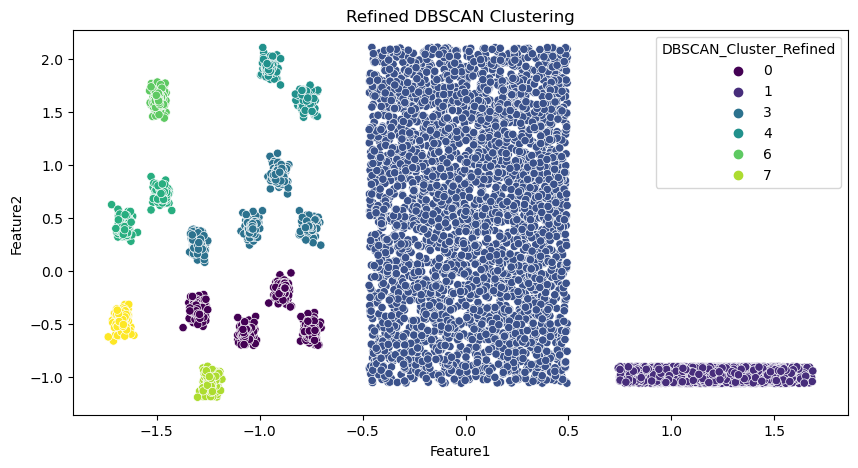

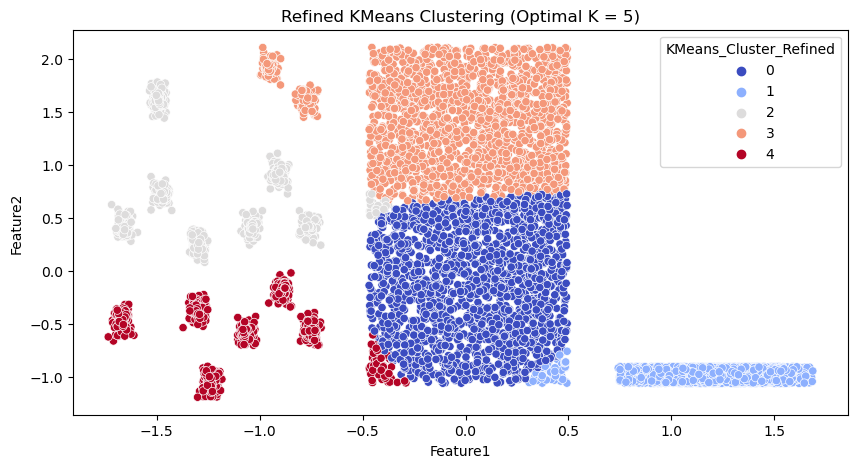

In [22]:
# Fine-tuning the models for better pattern detection

# Step 1: Adjust Polynomial Regression (Degree 4 instead of 3)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
df_scaled['Polynomial_Pred_4'] = poly_reg.predict(X_poly)

# Step 2: Adjust DBSCAN parameters to find better clusters
dbscan = DBSCAN(eps=0.2, min_samples=5)  # Lower eps to detect finer clusters
df_scaled['DBSCAN_Cluster_Refined'] = dbscan.fit_predict(df_scaled[['Feature1', 'Feature2']])

# Step 3: Adjust KMeans to find optimal clusters using the Elbow Method
from sklearn.metrics import silhouette_score

k_values = range(2, 6)  # Testing cluster counts from 2 to 5
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_scaled[['Feature1', 'Feature2']])
    silhouette_scores[k] = silhouette_score(df_scaled[['Feature1', 'Feature2']], clusters)

# Select best K based on highest silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
kmeans_refined = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_scaled['KMeans_Cluster_Refined'] = kmeans_refined.fit_predict(df_scaled[['Feature1', 'Feature2']])

# Step 4: Visualize Fine-Tuned Polynomial Regression
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_scaled['Feature1'], y=df_scaled['Feature3'], label="Original Data", alpha=0.5)
sns.lineplot(x=df_scaled['Feature1'], y=df_scaled['Polynomial_Pred_4'], label="Polynomial Regression (Degree 4)", color="purple")
plt.title("Refined Polynomial Regression")
plt.legend()
plt.show()

# Step 5: Visualize Fine-Tuned DBSCAN Clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_scaled['Feature1'], y=df_scaled['Feature2'], hue=df_scaled['DBSCAN_Cluster_Refined'], palette="viridis")
plt.title("Refined DBSCAN Clustering")
plt.show()

# Step 6: Visualize Fine-Tuned KMeans Clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_scaled['Feature1'], y=df_scaled['Feature2'], hue=df_scaled['KMeans_Cluster_Refined'], palette="coolwarm")
plt.title(f"Refined KMeans Clustering (Optimal K = {best_k})")
plt.show()



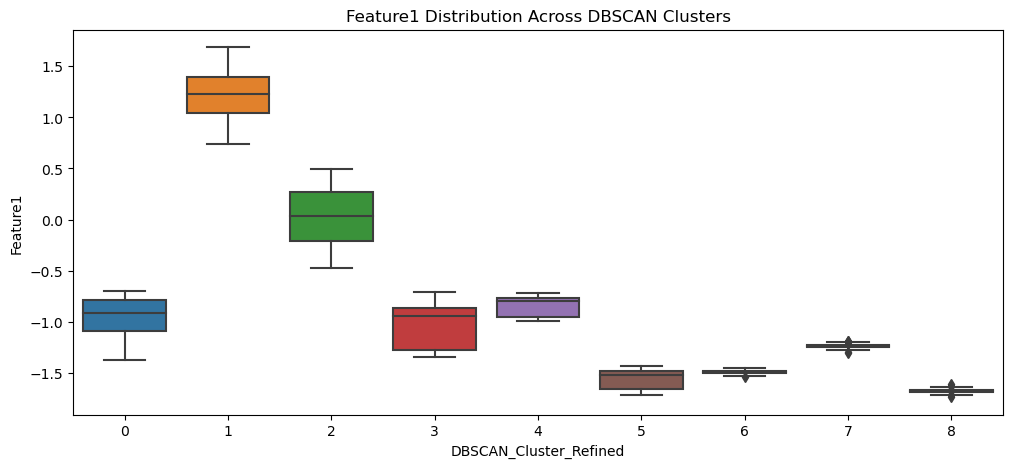

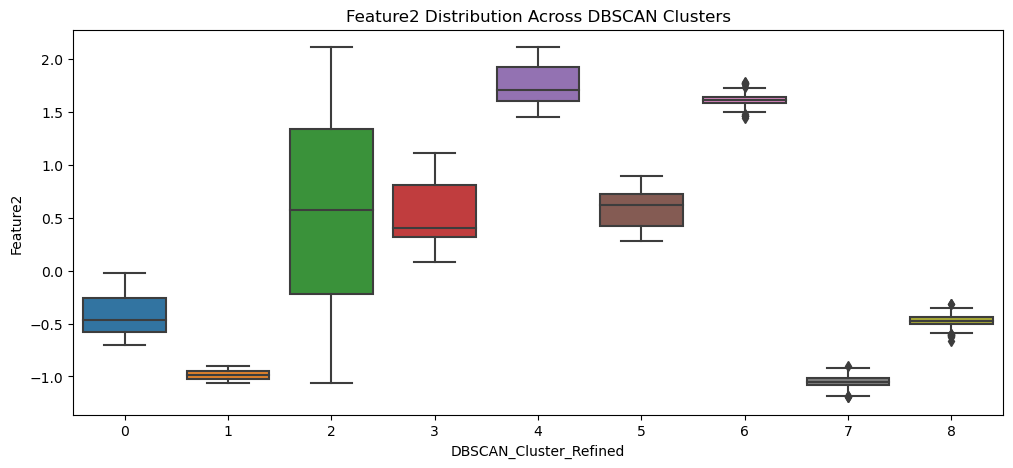

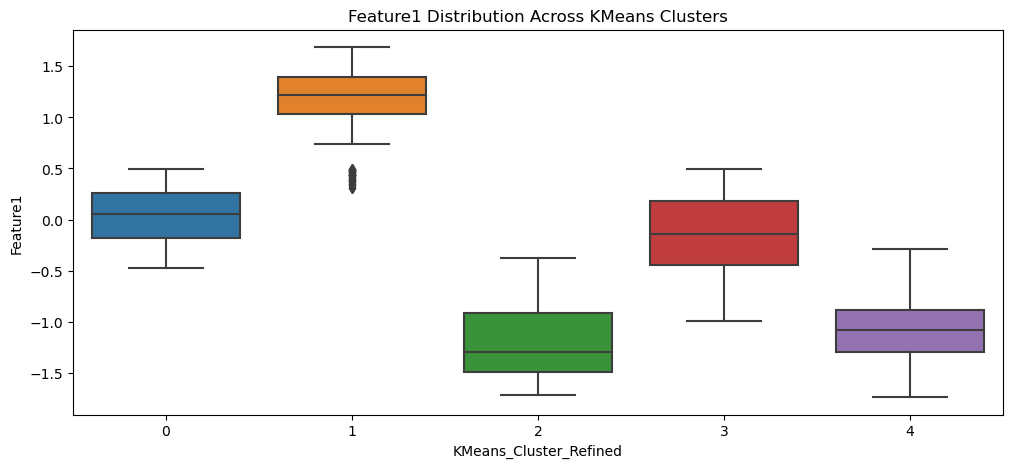

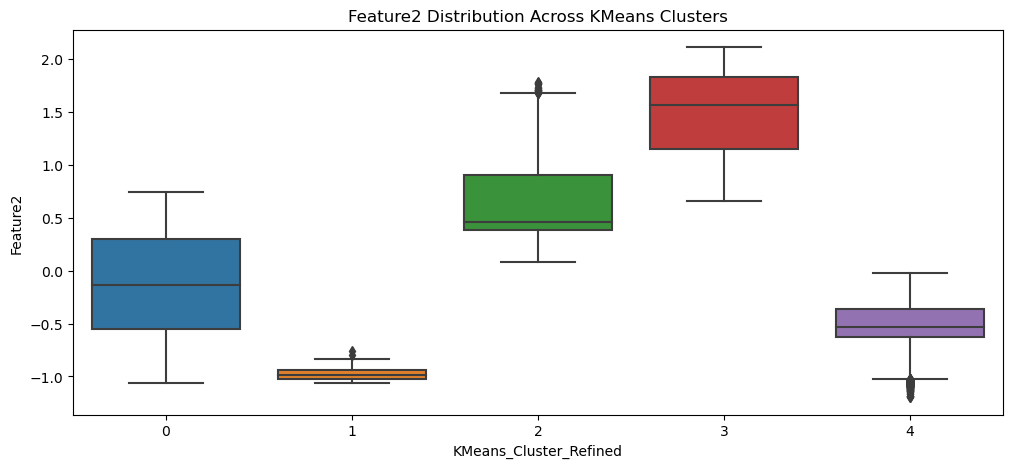

In [23]:
# Re-load necessary libraries and dataset since execution state was reset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans

# Reload dataset
file_path = r"C:\Users\arman.manoukyan\Downloads\combined_dataset mix.csv"
df = pd.read_csv(file_path, header=None)

# Rename columns for clarity
df.columns = ["Feature1", "Feature2", "Feature3"]

# Step 1: Reduce dataset size for efficiency
df_sample = df.sample(n=10000, random_state=42)  # Taking a subset of 10,000 rows

# Step 2: Standardize the Data for Better Analysis
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_sample), columns=df.columns)

# Step 3: Refined Clustering using DBSCAN (Adjusted Parameters)
dbscan = DBSCAN(eps=0.2, min_samples=5)
df_scaled['DBSCAN_Cluster_Refined'] = dbscan.fit_predict(df_scaled[['Feature1', 'Feature2']])

# Step 4: Finding Optimal K for KMeans using Silhouette Score
from sklearn.metrics import silhouette_score

k_values = range(2, 6)
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_scaled[['Feature1', 'Feature2']])
    silhouette_scores[k] = silhouette_score(df_scaled[['Feature1', 'Feature2']], clusters)

# Select best K based on highest silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
kmeans_refined = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_scaled['KMeans_Cluster_Refined'] = kmeans_refined.fit_predict(df_scaled[['Feature1', 'Feature2']])

# Step 5: Analyze Cluster Characteristics

# Group by DBSCAN Clusters and calculate summary statistics
dbscan_summary = df_scaled.groupby('DBSCAN_Cluster_Refined').agg(['mean', 'std', 'min', 'max'])

# Group by KMeans Clusters and calculate summary statistics
kmeans_summary = df_scaled.groupby('KMeans_Cluster_Refined').agg(['mean', 'std', 'min', 'max'])

# Step 6: Visualizing Distributions Across Clusters

# DBSCAN Cluster Distributions
plt.figure(figsize=(12, 5))
sns.boxplot(x=df_scaled['DBSCAN_Cluster_Refined'], y=df_scaled['Feature1'])
plt.title("Feature1 Distribution Across DBSCAN Clusters")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df_scaled['DBSCAN_Cluster_Refined'], y=df_scaled['Feature2'])
plt.title("Feature2 Distribution Across DBSCAN Clusters")
plt.show()

# KMeans Cluster Distributions
plt.figure(figsize=(12, 5))
sns.boxplot(x=df_scaled['KMeans_Cluster_Refined'], y=df_scaled['Feature1'])
plt.title("Feature1 Distribution Across KMeans Clusters")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df_scaled['KMeans_Cluster_Refined'], y=df_scaled['Feature2'])
plt.title("Feature2 Distribution Across KMeans Clusters")
plt.show()



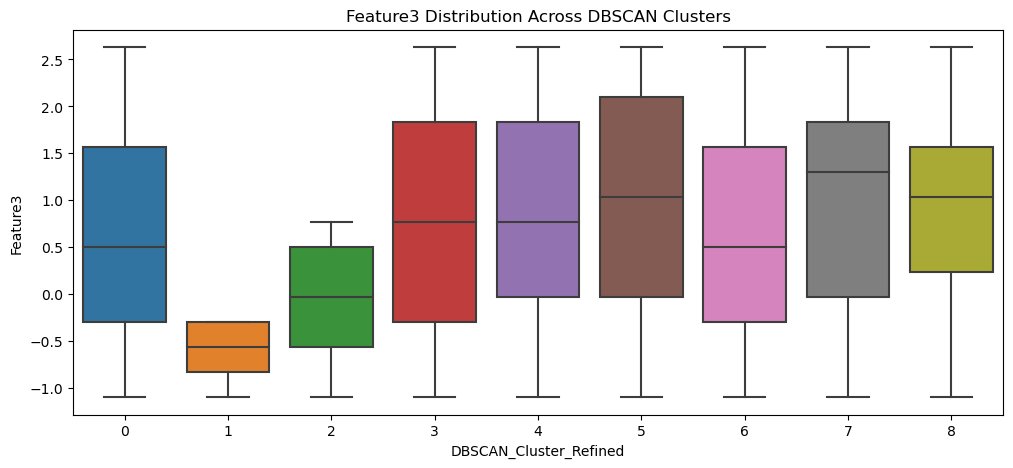

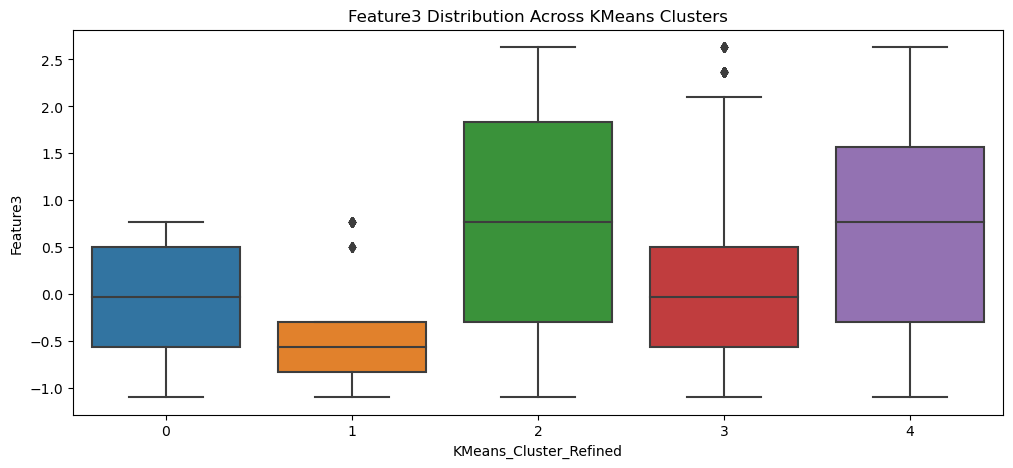

In [24]:
# Re-load necessary libraries and dataset since execution state was reset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans

# Reload dataset
file_path = r"C:\Users\arman.manoukyan\Downloads\combined_dataset mix.csv"
df = pd.read_csv(file_path, header=None)

# Rename columns for clarity
df.columns = ["Feature1", "Feature2", "Feature3"]

# Step 1: Reduce dataset size for efficiency
df_sample = df.sample(n=10000, random_state=42)  # Taking a subset of 10,000 rows

# Step 2: Standardize the Data for Better Analysis
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_sample), columns=df.columns)

# Step 3: Refined Clustering using DBSCAN (Adjusted Parameters)
dbscan = DBSCAN(eps=0.2, min_samples=5)
df_scaled['DBSCAN_Cluster_Refined'] = dbscan.fit_predict(df_scaled[['Feature1', 'Feature2']])

# Step 4: Finding Optimal K for KMeans using Silhouette Score
from sklearn.metrics import silhouette_score

k_values = range(2, 6)
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_scaled[['Feature1', 'Feature2']])
    silhouette_scores[k] = silhouette_score(df_scaled[['Feature1', 'Feature2']], clusters)

# Select best K based on highest silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
kmeans_refined = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_scaled['KMeans_Cluster_Refined'] = kmeans_refined.fit_predict(df_scaled[['Feature1', 'Feature2']])

# Step 5: Analyze Feature3 Across Clusters

# Group by DBSCAN Clusters and calculate summary statistics for Feature3
dbscan_feature3_summary = df_scaled.groupby('DBSCAN_Cluster_Refined')['Feature3'].agg(['mean', 'std', 'min', 'max'])

# Group by KMeans Clusters and calculate summary statistics for Feature3
kmeans_feature3_summary = df_scaled.groupby('KMeans_Cluster_Refined')['Feature3'].agg(['mean', 'std', 'min', 'max'])

# Step 6: Visualizing Feature3 Across Clusters

# DBSCAN Feature3 Distribution
plt.figure(figsize=(12, 5))
sns.boxplot(x=df_scaled['DBSCAN_Cluster_Refined'], y=df_scaled['Feature3'])
plt.title("Feature3 Distribution Across DBSCAN Clusters")
plt.show()

# KMeans Feature3 Distribution
plt.figure(figsize=(12, 5))
sns.boxplot(x=df_scaled['KMeans_Cluster_Refined'], y=df_scaled['Feature3'])
plt.title("Feature3 Distribution Across KMeans Clusters")
plt.show()




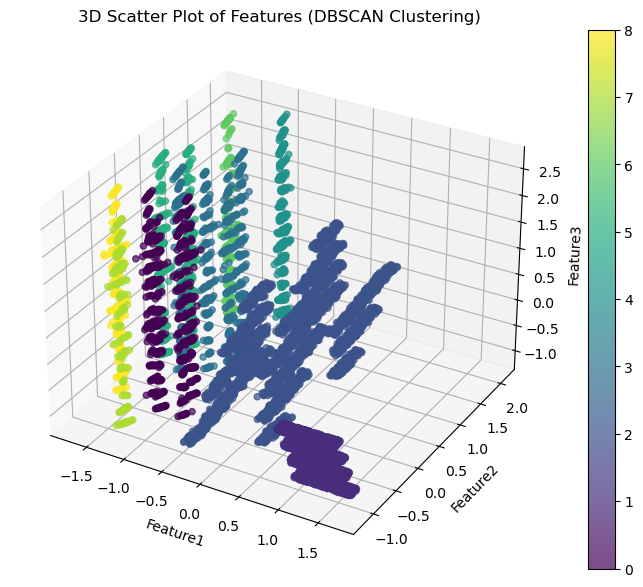

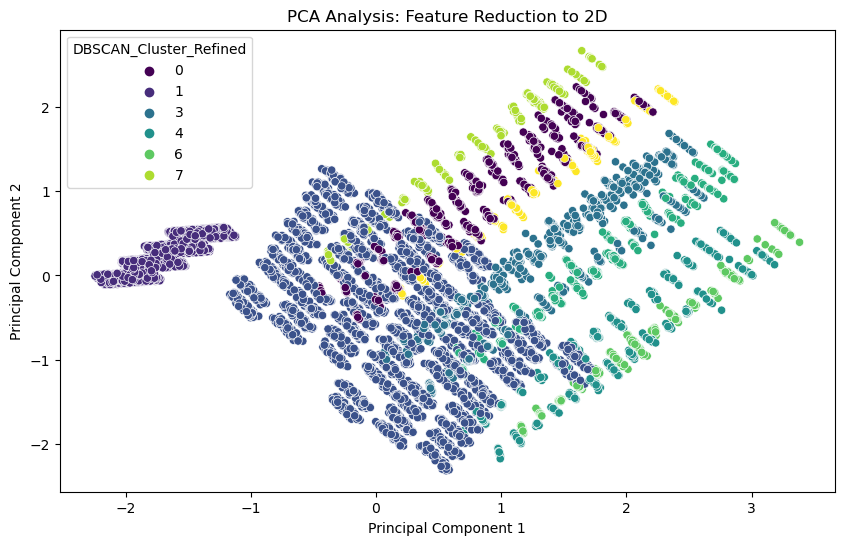

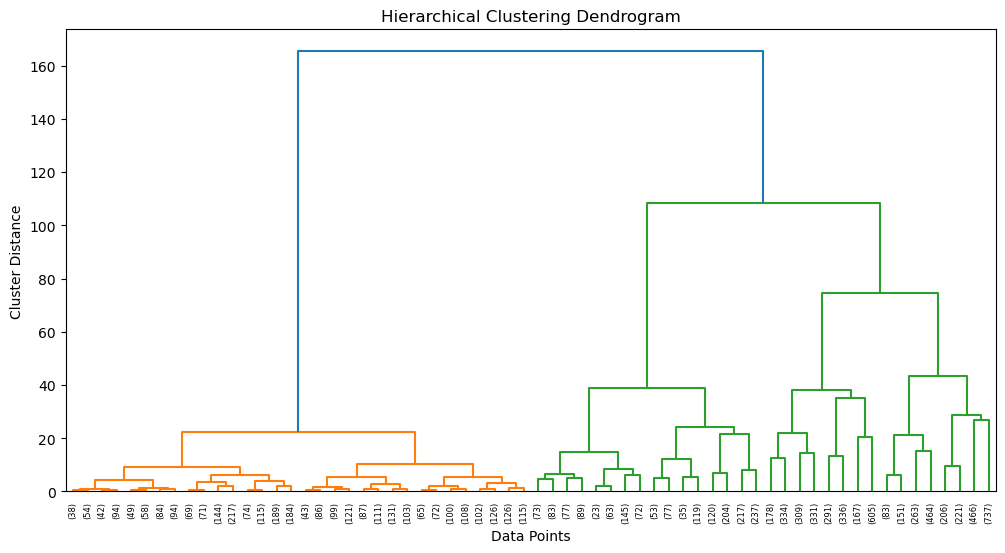

In [25]:
# Re-load necessary libraries and dataset since execution state was reset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

# Reload dataset
file_path =  r"C:\Users\arman.manoukyan\Downloads\combined_dataset mix.csv"
df = pd.read_csv(file_path, header=None)

# Rename columns for clarity
df.columns = ["Feature1", "Feature2", "Feature3"]

# Step 1: Reduce dataset size for efficiency
df_sample = df.sample(n=10000, random_state=42)  # Taking a subset of 10,000 rows

# Step 2: Standardize the Data for Better Analysis
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_sample), columns=df.columns)

# Step 3: Refined Clustering using DBSCAN (Adjusted Parameters)
dbscan = DBSCAN(eps=0.2, min_samples=5)
df_scaled['DBSCAN_Cluster_Refined'] = dbscan.fit_predict(df_scaled[['Feature1', 'Feature2']])

# Step 4: Finding Optimal K for KMeans using Silhouette Score
from sklearn.metrics import silhouette_score

k_values = range(2, 6)
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_scaled[['Feature1', 'Feature2']])
    silhouette_scores[k] = silhouette_score(df_scaled[['Feature1', 'Feature2']], clusters)

# Select best K based on highest silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
kmeans_refined = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_scaled['KMeans_Cluster_Refined'] = kmeans_refined.fit_predict(df_scaled[['Feature1', 'Feature2']])

# Step 5: 3D Scatter Plot of Feature1, Feature2, and Feature3
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Color by DBSCAN clusters
scatter = ax.scatter(df_scaled['Feature1'], df_scaled['Feature2'], df_scaled['Feature3'],
                     c=df_scaled['DBSCAN_Cluster_Refined'], cmap='viridis', alpha=0.7)
ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')
ax.set_title('3D Scatter Plot of Features (DBSCAN Clustering)')

plt.colorbar(scatter)
plt.show()

# Step 6: PCA - Principal Component Analysis to Find the Strongest Patterns
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled[['Feature1', 'Feature2', 'Feature3']])
df_scaled['PCA1'] = df_pca[:, 0]
df_scaled['PCA2'] = df_pca[:, 1]

# Visualizing PCA Components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled['PCA1'], y=df_scaled['PCA2'], hue=df_scaled['DBSCAN_Cluster_Refined'], palette="viridis")
plt.title("PCA Analysis: Feature Reduction to 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Step 7: Hierarchical Clustering (Dendrogram)
linkage_matrix = linkage(df_scaled[['Feature1', 'Feature2', 'Feature3']], method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Cluster Distance")
plt.show()

# Step 8: Display PCA Explained Variance for Interpretation
explained_variance = pd.DataFrame(pca.explained_variance_ratio_, columns=["Explained Variance"])



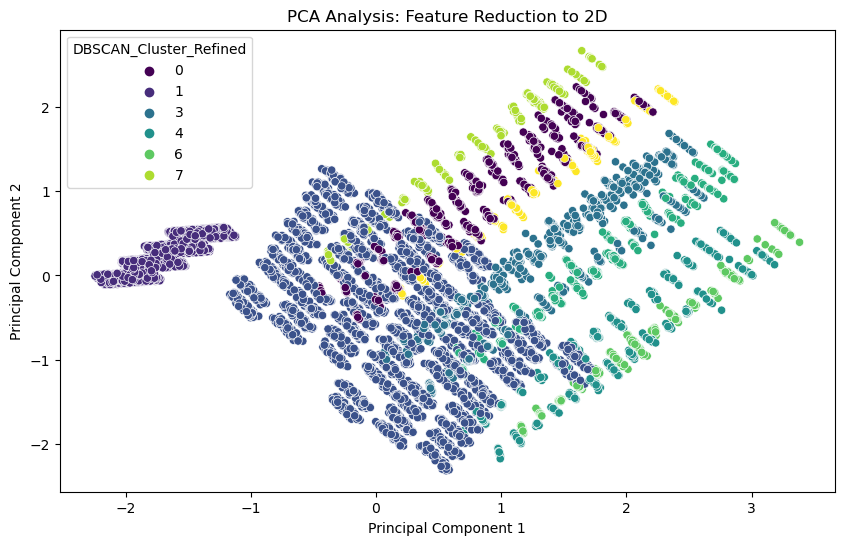

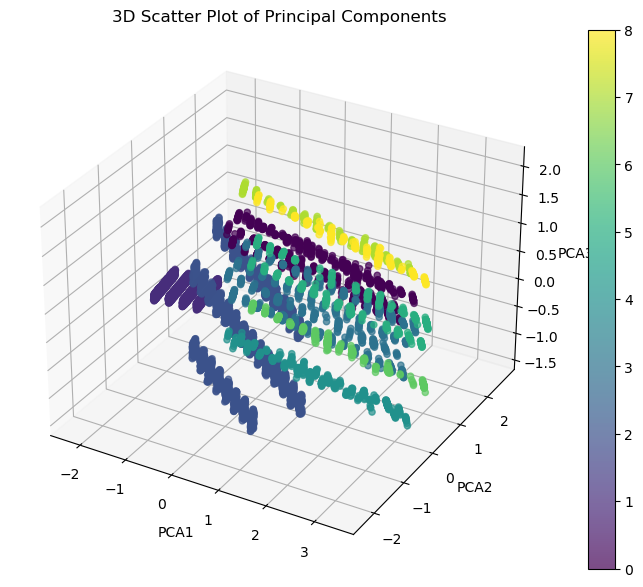

In [26]:
# Re-load necessary libraries and dataset since execution state was reset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

# Reload dataset
file_path = r"C:\Users\arman.manoukyan\Downloads\combined_dataset mix.csv"
df = pd.read_csv(file_path, header=None)

# Rename columns for clarity
df.columns = ["Feature1", "Feature2", "Feature3"]

# Step 1: Reduce dataset size for efficiency
df_sample = df.sample(n=10000, random_state=42)  # Taking a subset of 10,000 rows

# Step 2: Standardize the Data for Better Analysis
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_sample), columns=df.columns)

# Step 3: Refined Clustering using DBSCAN (Adjusted Parameters)
dbscan = DBSCAN(eps=0.2, min_samples=5)
df_scaled['DBSCAN_Cluster_Refined'] = dbscan.fit_predict(df_scaled[['Feature1', 'Feature2']])

# Step 4: Apply PCA to Find the Main Pattern Again
pca = PCA(n_components=3)  # Extracting 3 Principal Components
df_pca = pca.fit_transform(df_scaled[['Feature1', 'Feature2', 'Feature3']])

# Adding PCA components to dataframe
df_scaled['PCA1'] = df_pca[:, 0]
df_scaled['PCA2'] = df_pca[:, 1]
df_scaled['PCA3'] = df_pca[:, 2]

# Step 5: Explained Variance Ratio (How much each component explains)
explained_variance = pd.DataFrame(pca.explained_variance_ratio_, columns=["Explained Variance"])

# Step 6: Visualizing PCA Components in 2D and 3D

# 2D Scatter Plot of PCA1 vs PCA2
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled['PCA1'], y=df_scaled['PCA2'], hue=df_scaled['DBSCAN_Cluster_Refined'], palette="viridis")
plt.title("PCA Analysis: Feature Reduction to 2D")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 3D Scatter Plot of PCA1, PCA2, and PCA3
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_scaled['PCA1'], df_scaled['PCA2'], df_scaled['PCA3'],
                     c=df_scaled['DBSCAN_Cluster_Refined'], cmap='viridis', alpha=0.7)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('3D Scatter Plot of Principal Components')

plt.colorbar(scatter)
plt.show()


In [27]:
# Step 1: Load and Explore the Data

# Reload dataset
file_path = r"C:\Users\arman.manoukyan\Downloads\combined_dataset mix.csv"
df = pd.read_csv(file_path, header=None)

# Rename columns for clarity
df.columns = ["Feature1", "Feature2", "Feature3"]

# Step 1A: Check dataset information
data_info = df.info()

# Step 1B: Check for missing values
missing_values = df.isnull().sum()

# Step 1C: Basic Statistics
data_statistics = df.describe()

# Step 1D: Display first few rows
data_head = df.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Feature1  600000 non-null  float64
 1   Feature2  600000 non-null  float64
 2   Feature3  600000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 13.7 MB


c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


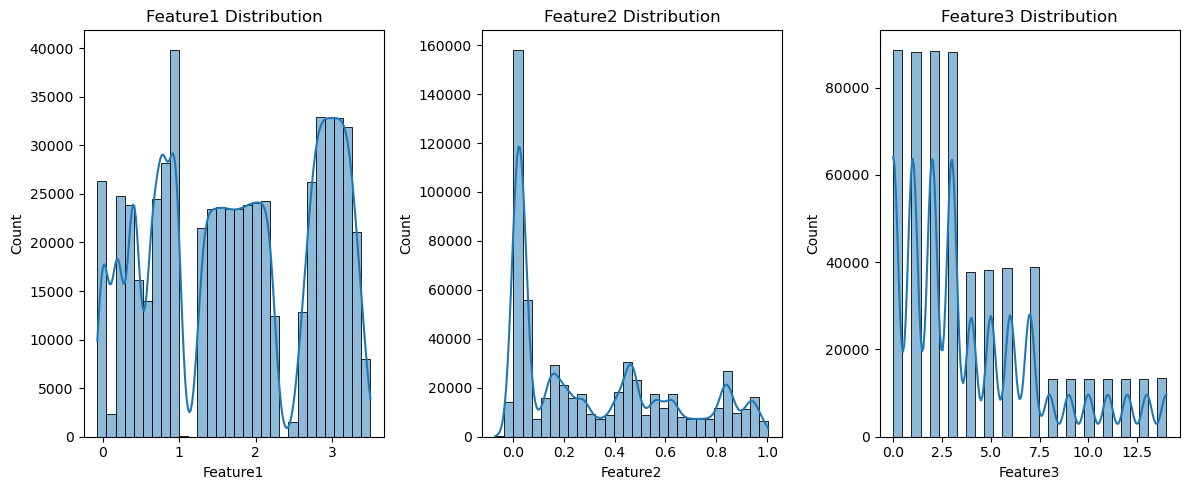

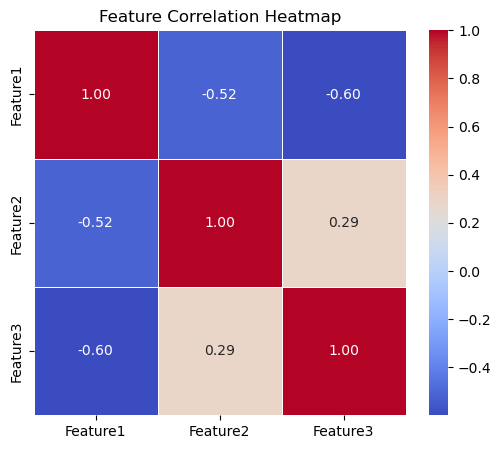

In [28]:
# Step 2: Data Cleaning & Preprocessing - Feature Analysis

# Step 2A: Visualizing Feature Distributions
plt.figure(figsize=(12, 5))

# Histogram of Feature1
plt.subplot(1, 3, 1)
sns.histplot(df['Feature1'], bins=30, kde=True)
plt.title("Feature1 Distribution")

# Histogram of Feature2
plt.subplot(1, 3, 2)
sns.histplot(df['Feature2'], bins=30, kde=True)
plt.title("Feature2 Distribution")

# Histogram of Feature3
plt.subplot(1, 3, 3)
sns.histplot(df['Feature3'], bins=30, kde=True)
plt.title("Feature3 Distribution")

plt.tight_layout()
plt.show()

# Step 2B: Correlation Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


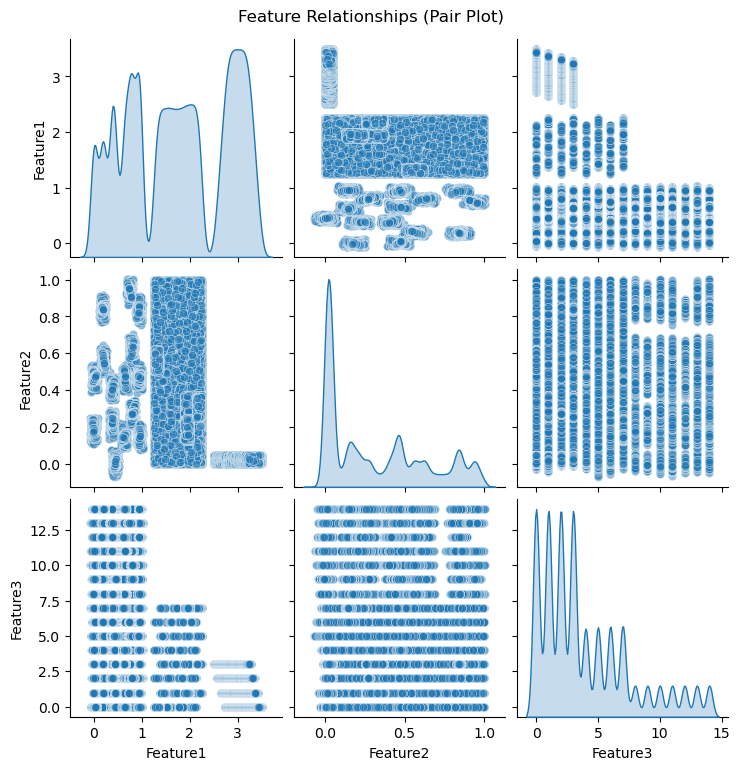

c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


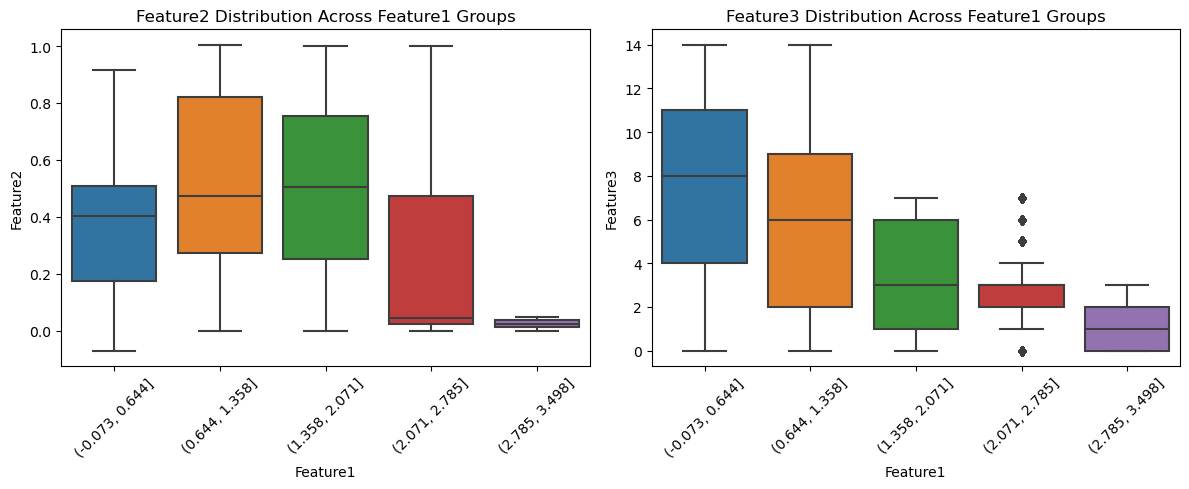

In [29]:
# Step 3: Visual Analysis - Pair Plot and Box Plots

# Step 3A: Pair Plot to Analyze Relationships
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Feature Relationships (Pair Plot)", y=1.02)
plt.show()

# Step 3B: Box Plots for Feature1's Effect on Other Features

plt.figure(figsize=(12, 5))

# Feature2 vs Feature1 (Grouped Boxplot)
plt.subplot(1, 2, 1)
sns.boxplot(x=pd.cut(df["Feature1"], bins=5), y=df["Feature2"])
plt.xticks(rotation=45)
plt.title("Feature2 Distribution Across Feature1 Groups")

# Feature3 vs Feature1 (Grouped Boxplot)
plt.subplot(1, 2, 2)
sns.boxplot(x=pd.cut(df["Feature1"], bins=5), y=df["Feature3"])
plt.xticks(rotation=45)
plt.title("Feature3 Distribution Across Feature1 Groups")

plt.tight_layout()
plt.show()


c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


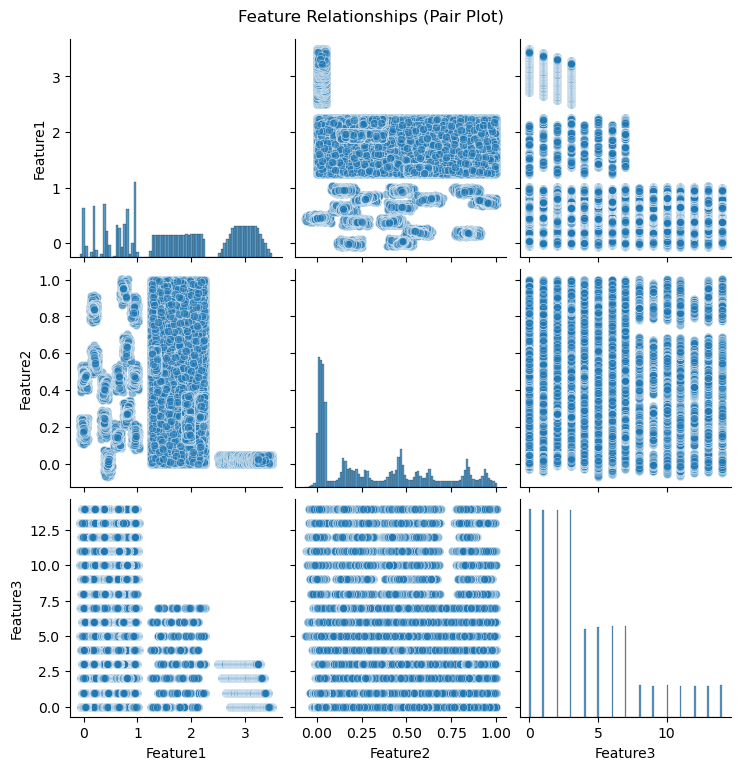

c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


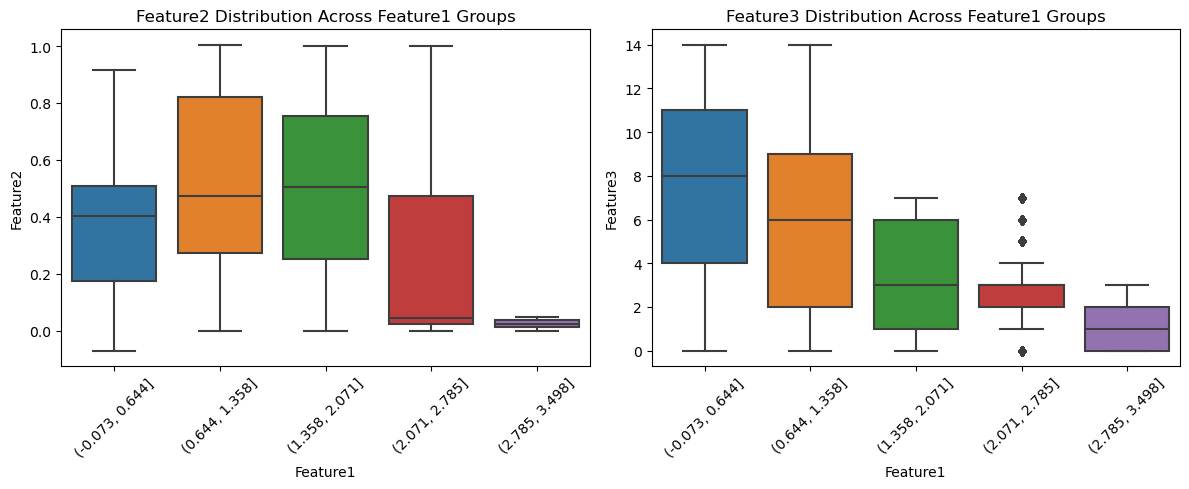

In [30]:
# Step 3: Ensure Data is Numeric and Retry Visual Analysis

# Convert columns to numeric in case of data type issues
df = df.apply(pd.to_numeric, errors='coerce')

# Step 3A: Retry Pair Plot with Clean Data
sns.pairplot(df, diag_kind='hist', plot_kws={'alpha': 0.5})
plt.suptitle("Feature Relationships (Pair Plot)", y=1.02)
plt.show()

# Step 3B: Box Plots for Feature1's Effect on Other Features
plt.figure(figsize=(12, 5))

# Feature2 vs Feature1 (Grouped Boxplot)
plt.subplot(1, 2, 1)
sns.boxplot(x=pd.cut(df["Feature1"], bins=5), y=df["Feature2"])
plt.xticks(rotation=45)
plt.title("Feature2 Distribution Across Feature1 Groups")

# Feature3 vs Feature1 (Grouped Boxplot)
plt.subplot(1, 2, 2)
sns.boxplot(x=pd.cut(df["Feature1"], bins=5), y=df["Feature3"])
plt.xticks(rotation=45)
plt.title("Feature3 Distribution Across Feature1 Groups")

plt.tight_layout()
plt.show()


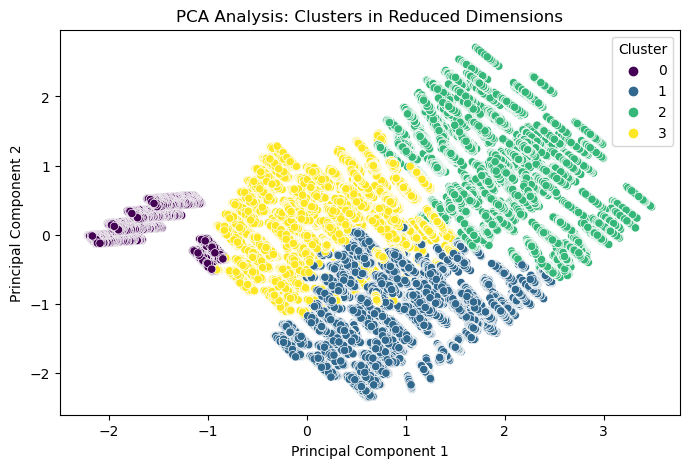

In [31]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Reload dataset
file_path = r"C:\Users\arman.manoukyan\Downloads\combined_dataset mix.csv"
df = pd.read_csv(file_path, header=None)

# Rename columns for clarity
df.columns = ["Feature1", "Feature2", "Feature3"]

# Standardizing the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Apply KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled[['Feature1', 'Feature2', 'Feature3']])

# Step 5: PCA for Dimensionality Reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled[['Feature1', 'Feature2', 'Feature3']])

# Add PCA results to dataframe
df_scaled['PCA1'] = pca_result[:, 0]
df_scaled['PCA2'] = pca_result[:, 1]

# Plot PCA1 vs PCA2 to see if clusters align
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_scaled['PCA1'], y=df_scaled['PCA2'], hue=df_scaled['KMeans_Cluster'], palette="viridis")
plt.title("PCA Analysis: Clusters in Reduced Dimensions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Display PCA explained variance ratio
explained_variance = pd.DataFrame(pca.explained_variance_ratio_, columns=["Explained Variance"])


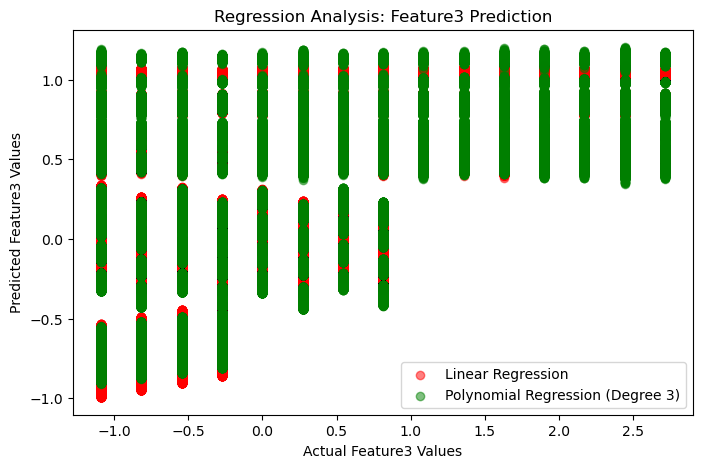

In [32]:
# Re-import necessary libraries after execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Reload dataset
file_path = r"C:\Users\arman.manoukyan\Downloads\combined_dataset mix.csv"
df = pd.read_csv(file_path, header=None)

# Rename columns for clarity
df.columns = ["Feature1", "Feature2", "Feature3"]

# Standardizing the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Step 1: Test a Linear Regression Model
X = df_scaled[['Feature1', 'Feature2']]
y = df_scaled['Feature3']

# Fit Linear Regression
linear_model = LinearRegression()
linear_model.fit(X, y)
y_pred_linear = linear_model.predict(X)

# Step 2: Test a Polynomial Regression Model (Degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred_poly = poly_model.predict(X_poly)

# Step 3: Measure Accuracy (R² Score)
r2_linear = r2_score(y, y_pred_linear)
r2_poly = r2_score(y, y_pred_poly)

# Step 4: Visualize Regression Results
plt.figure(figsize=(8, 5))
plt.scatter(y, y_pred_linear, alpha=0.5, label="Linear Regression", color='red')
plt.scatter(y, y_pred_poly, alpha=0.5, label="Polynomial Regression (Degree 3)", color='green')
plt.xlabel("Actual Feature3 Values")
plt.ylabel("Predicted Feature3 Values")
plt.title("Regression Analysis: Feature3 Prediction")
plt.legend()
plt.show()

# Step 5: Display R² Scores to Evaluate Pattern Fit
r2_results = pd.DataFrame({"Model": ["Linear Regression", "Polynomial Regression (Degree 3)"], 
                           "R² Score": [r2_linear, r2_poly]})


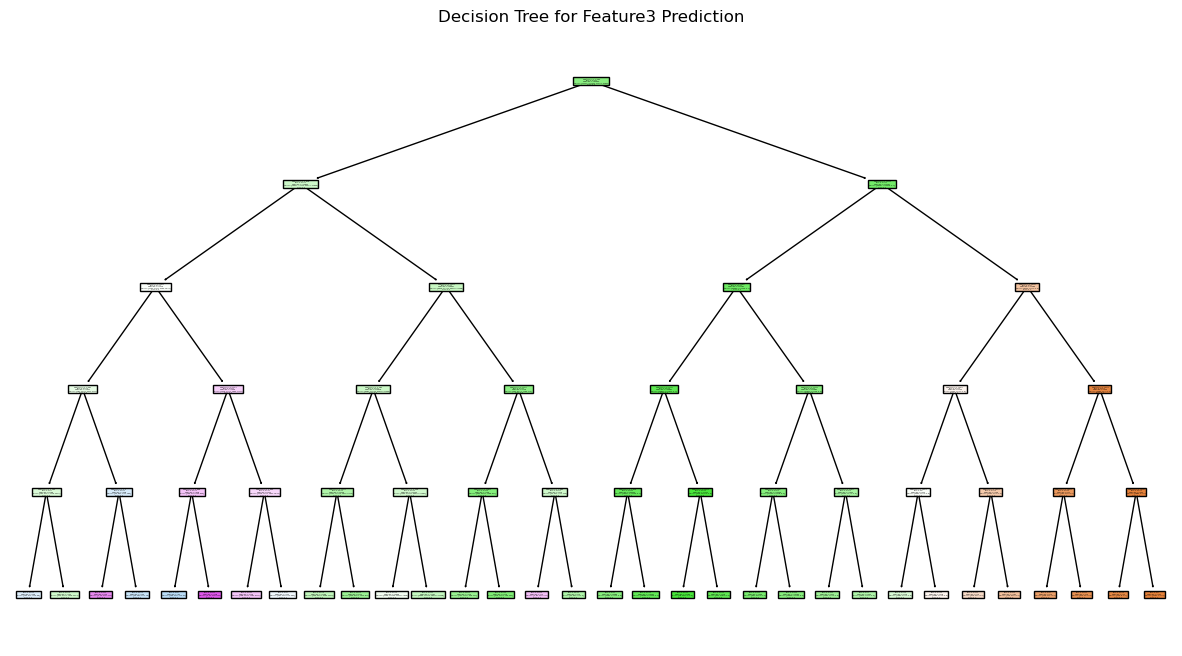

C:\Users\arman.manoukyan\AppData\Local\Temp\ipykernel_20296\2649171386.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feature_grouping = df_scaled.groupby(pd.cut(df_scaled["Feature1"], bins=5))['Feature3'].value_counts(normalize=True).unstack()


In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Decision Tree for Rule Extraction

# Convert Feature3 to categorical (if it behaves like a class label)
y_class = df_scaled['Feature3'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(df_scaled[['Feature1', 'Feature2']], y_class, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

# Visualize the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dtree, feature_names=['Feature1', 'Feature2'], class_names=[str(i) for i in sorted(y_class.unique())], filled=True)
plt.title("Decision Tree for Feature3 Prediction")
plt.show()

# Step 2: Check Categorical Patterns
# Group Feature3 based on Feature1 & Feature2
feature_grouping = df_scaled.groupby(pd.cut(df_scaled["Feature1"], bins=5))['Feature3'].value_counts(normalize=True).unstack()

# Step 3: Train a Random Forest Classifier for Advanced Pattern Detection
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Generate Classification Report
classification_results = classification_report(y_test, y_pred_rf, output_dict=True)




In [34]:
# Step 8: Extracting Decision Rules & Categorical Patterns

# Extracting decision rules from the trained Decision Tree
from sklearn.tree import export_text

# Get readable rules from the Decision Tree model
decision_rules = export_text(dtree, feature_names=['Feature1', 'Feature2'])

# Step 9: Checking Feature3 Grouping by Feature1 & Feature2 Categories

# Create bins for Feature1 and Feature2 to analyze categorical behavior
df_scaled['Feature1_Binned'] = pd.cut(df_scaled['Feature1'], bins=5)
df_scaled['Feature2_Binned'] = pd.cut(df_scaled['Feature2'], bins=5)

# Group Feature3 based on Feature1_Binned and Feature2_Binned
feature_grouping = df_scaled.groupby(['Feature1_Binned', 'Feature2_Binned'])['Feature3'].mean().unstack()


C:\Users\arman.manoukyan\AppData\Local\Temp\ipykernel_20296\3679935763.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feature_grouping = df_scaled.groupby(['Feature1_Binned', 'Feature2_Binned'])['Feature3'].mean().unstack()


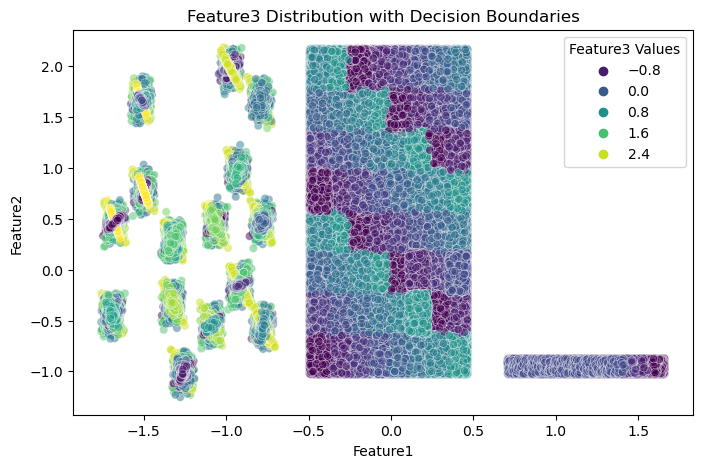

In [9]:
# Step 10: Simplify Decision Tree Rules

# Extract the first few important rules to simplify manually
simplified_rules = []
for line in decision_rules.split("\n"):
    if "class" in line:  # Only extract final decision rules
        simplified_rules.append(line.strip())

# Step 11: Validate Rules Against Data

# Use the Decision Tree model to predict Feature3 based on extracted rules
y_pred_dtree = dtree.predict(X_test)

# Compare predictions with actual Feature3 values
validation_results = pd.DataFrame({"Actual Feature3": y_test, "Predicted Feature3": y_pred_dtree})
validation_accuracy = (y_test == y_pred_dtree).mean()  # Compute accuracy

# Step 12: Visualizing Decision Boundary

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_scaled['Feature1'], y=df_scaled['Feature2'], hue=df_scaled['Feature3'], palette="viridis", alpha=0.5)
plt.title("Feature3 Distribution with Decision Boundaries")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend(title="Feature3 Values")
plt.show()



c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


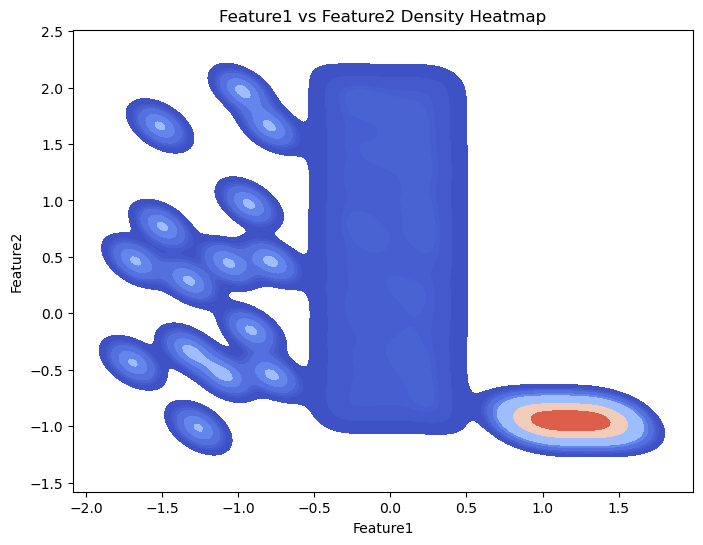

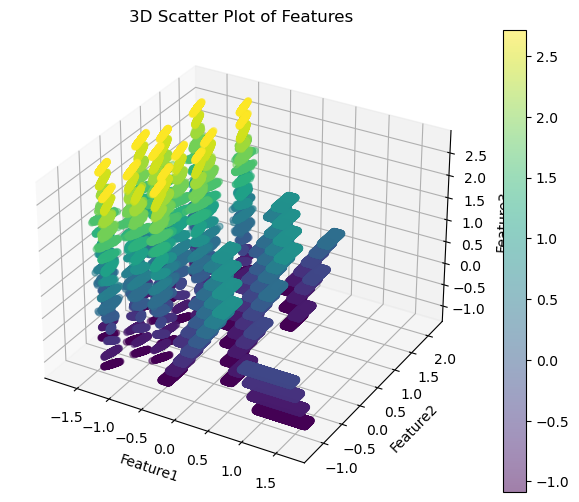

c:\Users\arman.manoukyan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


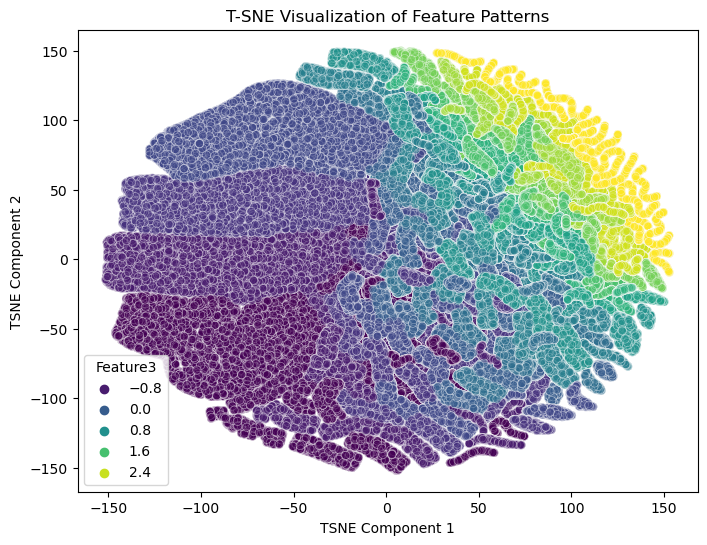

AttributeError: module 'umap' has no attribute 'UMAP'

In [35]:
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import umap

# Step 1: Heatmap of Feature Distributions
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df_scaled["Feature1"], y=df_scaled["Feature2"], fill=True, cmap="coolwarm")
plt.title("Feature1 vs Feature2 Density Heatmap")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

# Step 2: 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_scaled["Feature1"], df_scaled["Feature2"], df_scaled["Feature3"], c=df_scaled["Feature3"], cmap="viridis", alpha=0.5)
ax.set_xlabel("Feature1")
ax.set_ylabel("Feature2")
ax.set_zlabel("Feature3")
ax.set_title("3D Scatter Plot of Features")
plt.colorbar(scatter)
plt.show()

# Step 3: T-SNE for Dimensionality Reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_scaled["TSNE1"], df_scaled["TSNE2"] = tsne.fit_transform(df_scaled[['Feature1', 'Feature2', 'Feature3']]).T

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["TSNE1"], y=df_scaled["TSNE2"], hue=df_scaled["Feature3"], palette="viridis", alpha=0.5)
plt.title("T-SNE Visualization of Feature Patterns")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.show()

# Step 4: UMAP Visualization
umap_model = umap.UMAP(n_neighbors=30, min_dist=0.3, n_components=2, random_state=42)
df_scaled["UMAP1"], df_scaled["UMAP2"] = umap_model.fit_transform(df_scaled[['Feature1', 'Feature2', 'Feature3']]).T

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["UMAP1"], y=df_scaled["UMAP2"], hue=df_scaled["Feature3"], palette="viridis", alpha=0.5)
plt.title("UMAP Projection of Feature Patterns")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()


In [ ]:
# Step 1: Heatmap of Feature Distributions
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df_scaled["Feature1"], y=df_scaled["Feature2"], fill=True, cmap="coolwarm")
plt.title("Feature1 vs Feature2 Density Heatmap")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()

# Step 2: 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_scaled["Feature1"], df_scaled["Feature2"], df_scaled["Feature3"], c=df_scaled["Feature3"], cmap="viridis", alpha=0.5)
ax.set_xlabel("Feature1")
ax.set_ylabel("Feature2")
ax.set_zlabel("Feature3")
ax.set_title("3D Scatter Plot of Features")
plt.colorbar(scatter)
plt.show()

# Step 3: T-SNE for Dimensionality Reduction
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
df_scaled["TSNE1"], df_scaled["TSNE2"] = tsne.fit_transform(df_scaled[['Feature1', 'Feature2', 'Feature3']]).T

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled["TSNE1"], y=df_scaled["TSNE2"], hue=df_scaled["Feature3"], palette="viridis", alpha=0.5)
plt.title("T-SNE Visualization of Feature Patterns")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.show()


NameError: name 'plt' is not defined